# Independent Component Analysis
Independent component analysis is a method to decompose a signal mixture to its independent components. In the example bellow which is a summary of a lab that I have done in Udacity machine learning engineering course, we see that how the mixture of a noise field+ 2 musical instruments, which has been recorded 3 times (its important to have independent data sourse equal to the number of components we try to resolve), is going to be resolved to 3 new signals.


In [79]:
import numpy as np
import wave
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import FastICA
import warnings
warnings.filterwarnings('ignore')
from scipy.io import wavfile 

In [80]:
mix_1_wave = wave.open('D:\data\ICA mix 1.wav', 'r') # Read the wave file

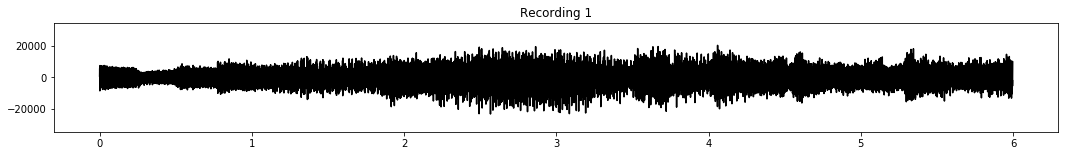

In [81]:
signal_1_raw = mix_1_wave.readframes(-1)# Extract Raw Audio from Wav File
signal_1 = np.fromstring(signal_1_raw, 'Int16') #a list of ints representing the sound
fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1) / fs, num=len(signal_1))
plt.figure(figsize=(18, 2))
plt.title('Recording 1')
plt.plot(timing, signal_1, c="#000000")
plt.ylim(-35000, 35000)
plt.show()

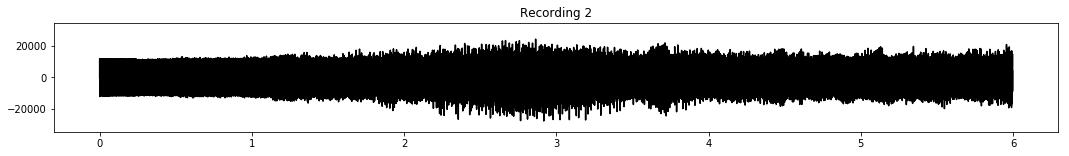

In [82]:
mix_2_wave = wave.open('D:\data\ICA mix 2.wav', 'r')
signal_raw_2 = mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_raw_2, 'Int16')
plt.figure(figsize=(18, 2))
plt.title('Recording 2')
plt.plot(timing, signal_2, c="#000000")
plt.ylim(-35000, 35000)
plt.show()

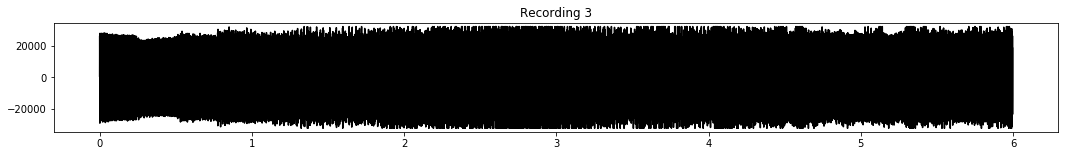

In [84]:
mix_3_wave = wave.open('D:\data\ICA mix 3.wav', 'r')
signal_raw_3 = mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_raw_3, 'Int16')
plt.figure(figsize=(18, 2))
plt.title('Recording 3')
plt.plot(timing, signal_3, c="#000000")
plt.ylim(-35000, 35000)
plt.show()

In [46]:
X = list(zip(signal_1, signal_2, signal_3))
ica = FastICA(n_components=3)
ica_result = ica.fit_transform(X)
result_signal_1 = ica_result[:, 0]
result_signal_2 = ica_result[:, 1]
result_signal_3 = ica_result[:, 2]

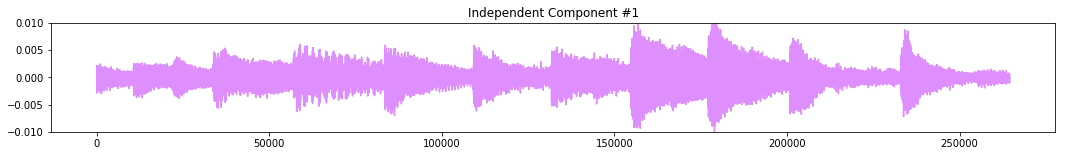

In [85]:
# Plot Independent Component #1
plt.figure(figsize=(18, 2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

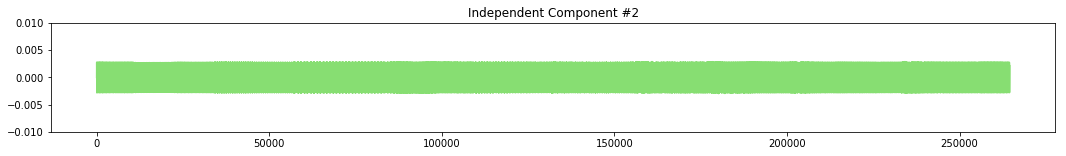

In [86]:
# Plot Independent Component #2
plt.figure(figsize=(18, 2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

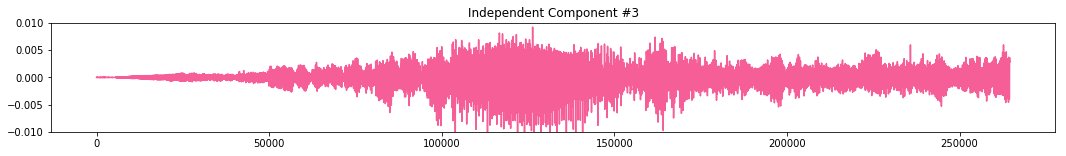

In [87]:
# Plot Independent Component #3
plt.figure(figsize=(18, 2))
plt.title('Independent Component #3')
plt.plot(result_signal_3, c="#f65e97")
plt.ylim(-0.010, 0.010)
plt.show()

In [52]:
# Convert to int, map the appropriate range, and increase the volume a little bit
result_signal_1_int = np.int16(result_signal_1 * 32767 * 100)
result_signal_2_int = np.int16(result_signal_2 * 32767 * 100)
result_signal_3_int = np.int16(result_signal_3 * 32767 * 100)
# Write wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)